In [1]:
from non_markovian import get_spectral_density, compute_correlation_function, fit_correlation_function
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [15]:
eta = 1.0
omega_c = 10.0
omegas = jnp.linspace(0, 30, 5000)

# 1. Ohmic (s=1)
def ohmic_spectral_density(omega):
    return get_spectral_density(omega, eta, omega_c, s=1.0)

# 2. Sub-Ohmic (s=0.5)
def sub_ohmic_spectral_density(omega):
    return get_spectral_density(omega, eta, omega_c, s=0.5)

# 3. Super-Ohmic (s=3.0) 
def super_ohmic_spectral_density(omega):
    return get_spectral_density(omega, eta, omega_c, s=3.0)

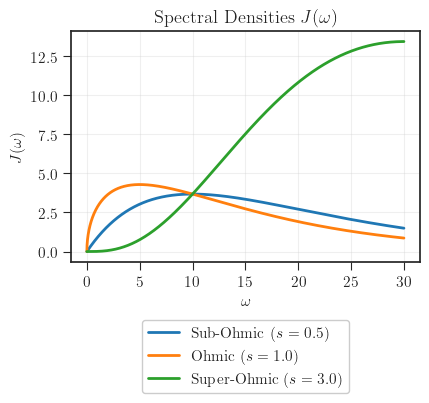

In [3]:
plt.style.use(['seaborn-v0_8-white', './style.mplstyle'])

fig, ax = plt.subplots(figsize=(4.5, 3))

plt.plot(omegas, ohmic_spectral_density(omegas), label=r'Sub-Ohmic ($s=0.5$)', linewidth=2)
plt.plot(omegas, sub_ohmic_spectral_density(omegas), label=r'Ohmic ($s=1.0$)', linewidth=2)
plt.plot(omegas, super_ohmic_spectral_density(omegas), label=r'Super-Ohmic ($s=3.0$)', linewidth=2)

plt.title(r"Spectral Densities $J(\omega)$")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$J(\omega)$')
plt.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, -0.6))
plt.grid(True, alpha=0.3)
plt.show()

In [4]:
times = jnp.linspace(-0.6, 0.6, 5000)
beta = 1.0
w_max = 1_000   # Integration limit (should be >> OMEGA_C)
n_steps = 5000  # Precision of integration

# 1. Ohmic (s=1)
C_t_ohmic = compute_correlation_function(times, ohmic_spectral_density, beta, w_max, n_steps)

# 2. Sub-Ohmic (s=0.5)
C_t_sub_ohmic = compute_correlation_function(times, sub_ohmic_spectral_density, beta, w_max, n_steps)

# 3. Super-Ohmic (s=3.0)
C_t_super_ohmic = compute_correlation_function(times, super_ohmic_spectral_density, beta, w_max, n_steps)

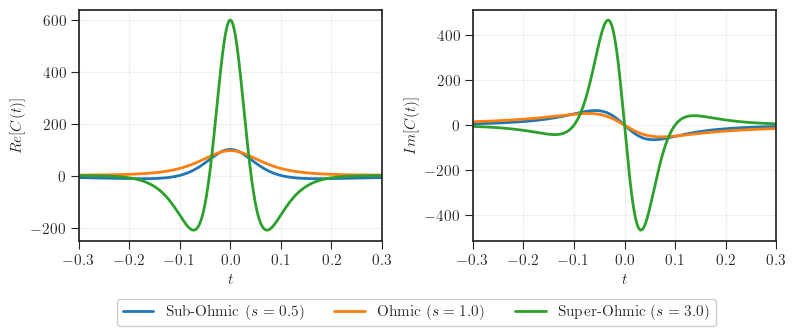

In [5]:
fig, ax = plt.subplots(1,2, figsize=(9, 3))

plt.subplots_adjust(
    wspace=0.3 
)

ax[0].plot(times, jnp.real(C_t_ohmic), label=r'Sub-Ohmic ($s=0.5$)', linewidth = 2)
ax[0].plot(times, jnp.real(C_t_sub_ohmic), label=r'Ohmic ($s=1.0$)', linewidth = 2)
ax[0].plot(times, jnp.real(C_t_super_ohmic), label=r'Super-Ohmic ($s=3.0$)', linewidth = 2)
ax[0].set_xlim(-0.3, 0.3)

ax[1].plot(times, jnp.imag(C_t_ohmic), label=r'Sub-Ohmic ($s=0.5$)', linewidth = 2)
ax[1].plot(times, jnp.imag(C_t_sub_ohmic), label=r'Ohmic ($s=1.0$)', linewidth = 2)
ax[1].plot(times, jnp.imag(C_t_super_ohmic), label=r'Super-Ohmic ($s=3.0$)', linewidth = 2)
ax[1].set_xlim(-0.3, 0.3)

ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$Re[C(t)]$')
ax[0].grid(True, alpha=0.3)

ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$Im[C(t)]$')
ax[1].grid(True, alpha=0.3)

lines, labels = ax[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.2))

plt.show()

# Correlation Fitting

## ohmic

In [6]:
N_MODES = 10
params_fit, C_fit, history = fit_correlation_function(times, C_t_ohmic, n_modes=N_MODES, epochs=10000, learning_rate=0.1)

Starting fit with 10 modes...
Epoch 0: Loss = 3.877957e+03
Epoch 1000: Loss = 5.611518e+01
Epoch 2000: Loss = 2.353586e+01
Epoch 3000: Loss = 1.049985e+01
Epoch 4000: Loss = 3.287930e+00
Epoch 5000: Loss = 2.119111e+00
Epoch 6000: Loss = 1.529965e+00
Epoch 7000: Loss = 1.135997e+00
Epoch 8000: Loss = 8.253760e-01
Epoch 9000: Loss = 6.932988e-01
Final Loss: 5.855769e-01


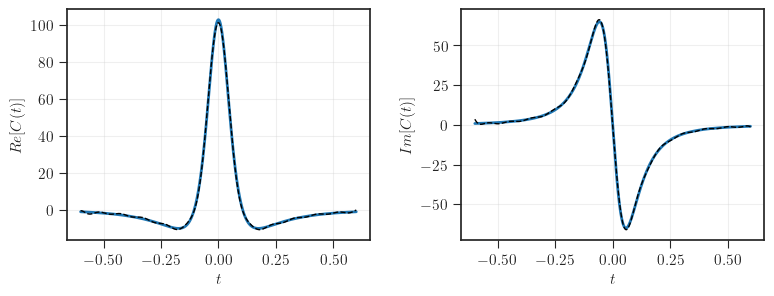

In [7]:
fig, ax = plt.subplots(1,2, figsize=(9, 3))

plt.subplots_adjust(
    wspace=0.3 
)

ax[0].plot(times, jnp.real(C_t_ohmic), label=r'Ohmic ($s=1.0$)', linewidth = 2)
ax[0].plot(times, jnp.real(C_fit), label=r'Fit', linewidth = 1, color = 'k',
        linestyle = '--')
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$Re[C(t)]$')
ax[0].grid(True, alpha=0.3)

ax[1].plot(times, jnp.imag(C_t_ohmic), label=r'Sub-Ohmic ($s=1.0$)', linewidth = 2)
ax[1].plot(times, jnp.imag(C_fit), label=r'Fit', linewidth = 1, color = 'k',
        linestyle = '--')

ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$Im[C(t)]$')
ax[1].grid(True, alpha=0.3)

In [8]:
print("\n--- Fitted Parameters for Embedding ---")
for k in range(N_MODES):
    g = params_fit['gammas'][k]
    c = params_fit['weights'][k]
    print(f"Mode {k+1}:")
    print(f"  Rate (gamma)  = {g.real:.4f} + {g.imag:.4f}j")
    print(f"  Weight (c)    = {c.real:.4f} + {c.imag:.4f}j")


--- Fitted Parameters for Embedding ---
Mode 1:
  Rate (gamma)  = 0.4404 + 57.7554j
  Weight (c)    = 1.4910 + 0.1024j
Mode 2:
  Rate (gamma)  = 0.0062 + 15.4429j
  Weight (c)    = 24.4450 + 5.7279j
Mode 3:
  Rate (gamma)  = 0.7064 + 39.8009j
  Weight (c)    = 6.6565 + 0.4096j
Mode 4:
  Rate (gamma)  = 0.3984 + 1.6086j
  Weight (c)    = 9.5947 + -1.1570j
Mode 5:
  Rate (gamma)  = 0.0669 + 8.0097j
  Weight (c)    = 27.4650 + 13.6997j
Mode 6:
  Rate (gamma)  = 0.6128 + 48.8321j
  Weight (c)    = 3.3359 + 0.2022j
Mode 7:
  Rate (gamma)  = 0.7777 + 30.9024j
  Weight (c)    = 12.4227 + 0.7379j
Mode 8:
  Rate (gamma)  = 0.0602 + 8.7718j
  Weight (c)    = -2.2905 + -14.3571j
Mode 9:
  Rate (gamma)  = 3.7242 + 19.6719j
  Weight (c)    = -5.8418 + 0.4319j
Mode 10:
  Rate (gamma)  = 0.4620 + 21.7228j
  Weight (c)    = 23.7516 + -5.7396j


## sub-ohmic

In [9]:
N_MODES = 10
params_fit, C_fit, history = fit_correlation_function(times, C_t_sub_ohmic, n_modes=N_MODES, epochs=10000, learning_rate=0.1)

Starting fit with 10 modes...
Epoch 0: Loss = 3.769722e+03
Epoch 1000: Loss = 4.964905e+01
Epoch 2000: Loss = 1.916194e+01
Epoch 3000: Loss = 8.410050e+00
Epoch 4000: Loss = 5.238901e+00
Epoch 5000: Loss = 3.983164e+00
Epoch 6000: Loss = 2.261897e+00
Epoch 7000: Loss = 1.540791e+00
Epoch 8000: Loss = 9.052330e-01
Epoch 9000: Loss = 5.770633e-01
Final Loss: 4.066769e-01


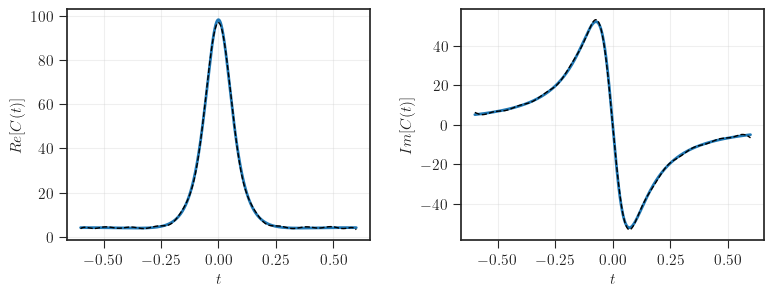

In [10]:
fig, ax = plt.subplots(1,2, figsize=(9, 3))

plt.subplots_adjust(
    wspace=0.3 
)

ax[0].plot(times, jnp.real(C_t_sub_ohmic), label=r'Ohmic ($s=1.0$)', linewidth = 2)
ax[0].plot(times, jnp.real(C_fit), label=r'Fit', linewidth = 1, color = 'k',
        linestyle = '--')
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$Re[C(t)]$')
ax[0].grid(True, alpha=0.3)

ax[1].plot(times, jnp.imag(C_t_sub_ohmic), label=r'Sub-Ohmic ($s=1.0$)', linewidth = 2)
ax[1].plot(times, jnp.imag(C_fit), label=r'Fit', linewidth = 1, color = 'k',
        linestyle = '--')

ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$Im[C(t)]$')
ax[1].grid(True, alpha=0.3)

In [11]:
print("\n--- Fitted Parameters for Embedding ---")
for k in range(N_MODES):
    g = params_fit['gammas'][k]
    c = params_fit['weights'][k]
    print(f"Mode {k+1}:")
    print(f"  Rate (gamma)  = {g.real:.4f} + {g.imag:.4f}j")
    print(f"  Weight (c)    = {c.real:.4f} + {c.imag:.4f}j")


--- Fitted Parameters for Embedding ---
Mode 1:
  Rate (gamma)  = 0.0631 + 48.6327j
  Weight (c)    = -11.1102 + 10.4210j
Mode 2:
  Rate (gamma)  = 0.5865 + 23.3583j
  Weight (c)    = 12.4371 + 1.4324j
Mode 3:
  Rate (gamma)  = 1.3431 + 14.1708j
  Weight (c)    = 30.8024 + -2.5292j
Mode 4:
  Rate (gamma)  = 0.0052 + 6.7352j
  Weight (c)    = 25.7701 + -2.2857j
Mode 5:
  Rate (gamma)  = 0.5655 + 1.2777j
  Weight (c)    = 26.8220 + 14.9806j
Mode 6:
  Rate (gamma)  = 0.0092 + 48.6838j
  Weight (c)    = 12.3576 + -10.4265j
Mode 7:
  Rate (gamma)  = 0.0487 + 40.7823j
  Weight (c)    = 3.0749 + 0.0564j
Mode 8:
  Rate (gamma)  = 1.2233 + 0.5416j
  Weight (c)    = -5.1125 + -14.2353j
Mode 9:
  Rate (gamma)  = 4.3485 + 14.7800j
  Weight (c)    = -4.6803 + 2.2983j
Mode 10:
  Rate (gamma)  = 0.2125 + 31.9232j
  Weight (c)    = 6.3888 + 0.2909j


## super-ohmic

In [12]:
N_MODES = 10
params_fit, C_fit, history = fit_correlation_function(times, C_t_super_ohmic, n_modes=N_MODES, epochs=10000, learning_rate=0.1)

Starting fit with 10 modes...
Epoch 0: Loss = 3.196714e+04
Epoch 1000: Loss = 1.295060e+03
Epoch 2000: Loss = 3.843193e+02
Epoch 3000: Loss = 1.889661e+02
Epoch 4000: Loss = 1.503221e+02
Epoch 5000: Loss = 1.286532e+02
Epoch 6000: Loss = 5.551202e+01
Epoch 7000: Loss = 5.243115e+01
Epoch 8000: Loss = 5.212027e+01
Epoch 9000: Loss = 6.291766e+01
Final Loss: 5.184931e+01


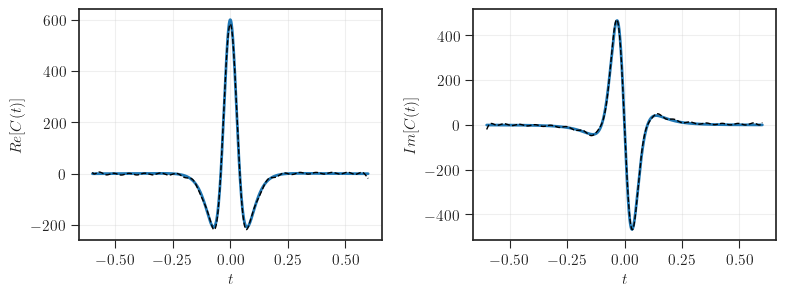

In [13]:
fig, ax = plt.subplots(1,2, figsize=(9, 3))

plt.subplots_adjust(
    wspace=0.3 
)

ax[0].plot(times, jnp.real(C_t_super_ohmic), label=r'Ohmic ($s=1.0$)', linewidth = 2)
ax[0].plot(times, jnp.real(C_fit), label=r'Fit', linewidth = 1, color = 'k',
        linestyle = '--')
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$Re[C(t)]$')
ax[0].grid(True, alpha=0.3)

ax[1].plot(times, jnp.imag(C_t_super_ohmic), label=r'Sub-Ohmic ($s=1.0$)', linewidth = 2)
ax[1].plot(times, jnp.imag(C_fit), label=r'Fit', linewidth = 1, color = 'k',
        linestyle = '--')

ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$Im[C(t)]$')
ax[1].grid(True, alpha=0.3)

In [14]:
print("\n--- Fitted Parameters for Embedding ---")
for k in range(N_MODES):
    g = params_fit['gammas'][k]
    c = params_fit['weights'][k]
    print(f"Mode {k+1}:")
    print(f"  Rate (gamma)  = {g.real:.4f} + {g.imag:.4f}j")
    print(f"  Weight (c)    = {c.real:.4f} + {c.imag:.4f}j")


--- Fitted Parameters for Embedding ---
Mode 1:
  Rate (gamma)  = 0.7959 + 56.5225j
  Weight (c)    = 57.7696 + 3.2402j
Mode 2:
  Rate (gamma)  = 0.4577 + 74.9714j
  Weight (c)    = 21.4954 + 1.0319j
Mode 3:
  Rate (gamma)  = 0.9755 + 47.4697j
  Weight (c)    = 83.2073 + 4.7771j
Mode 4:
  Rate (gamma)  = 1.4708 + 29.8809j
  Weight (c)    = 116.2940 + 4.5159j
Mode 5:
  Rate (gamma)  = 1.9169 + 21.2961j
  Weight (c)    = 100.4023 + -0.8105j
Mode 6:
  Rate (gamma)  = 0.6296 + 65.7129j
  Weight (c)    = 36.6409 + 1.9169j
Mode 7:
  Rate (gamma)  = 0.2399 + 84.0154j
  Weight (c)    = 11.1243 + 0.5744j
Mode 8:
  Rate (gamma)  = 2.4014 + 11.8139j
  Weight (c)    = 49.7063 + -28.6219j
Mode 9:
  Rate (gamma)  = 6.6169 + 12.3906j
  Weight (c)    = -0.2743 + 8.8396j
Mode 10:
  Rate (gamma)  = 1.1885 + 38.5855j
  Weight (c)    = 106.6178 + 5.7268j
